# Data Preprocessing

In [1]:
# Installing imblearn library
!pip install imblearn

In [15]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pickle as pkl

import warnings
warnings.filterwarnings('ignore') 

## Balancing data with SMOTE

In [16]:
def oversampling(X_train, y_train):
    sm = SMOTE(sampling_strategy='minority', random_state=7)
    
    train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    
    oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)
    oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
    
    oversampleTrain_output = r'..\data\processed\oversampleTrain.csv'

    # save oversampling data set to csv
    oversampled_train.to_csv(oversampleTrain_output, index=False)
    
    print("Before OverSampling, value counts of class variable:\n",train['Class'].value_counts())
    print("After OverSampling, value counts of class variable:\n",oversampled_train['Class'].value_counts())
    
    sns.countplot(oversampled_train['Class'])
    plt.title('Distribution of the Class after SMOTE balancing')

Before OverSampling, value counts of class variable:
 0    213233
1       372
Name: Class, dtype: int64
After OverSampling, value counts of class variable:
 0    213233
1    213233
Name: Class, dtype: int64


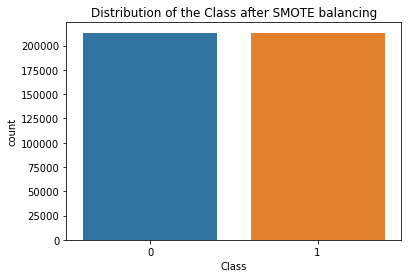

In [17]:
train_data = r'..\data\processed\Split_data\Train.csv'
df_train=pd.read_csv(train_data)
oversampling(df_train.drop('Class', axis=1), df_train['Class'])

# Floating

In [18]:
df_train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
oversampleTrain_data = r'..\data\processed\oversampleTrain.csv'
df_oversample_train=pd.read_csv(oversampleTrain_data)
df_oversample_train

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,130747.000000,2.047163,0.107987,-1.806515,0.072733,0.248371,-1.744837,0.712448,-0.488842,...,-0.261380,0.241017,0.822618,0.023000,0.549868,0.322173,0.191755,-0.085025,-0.084292,0.770000
1,0,81344.000000,1.282404,0.459864,-0.372286,0.826375,0.463568,-0.466407,0.460867,-0.186469,...,-0.096751,0.013986,0.083896,-0.247504,-0.325527,0.927293,-0.272555,-0.010168,-0.005332,1.790000
2,0,159004.000000,-0.414863,0.012026,1.356386,1.107374,0.813456,-0.156497,-0.372675,0.031095,...,0.564341,-0.052272,-0.088160,0.062521,-0.680805,-0.641474,-0.159995,0.237628,0.204343,5.950000
3,0,61662.000000,-1.432948,1.478076,0.576724,0.207540,-0.670662,-0.464572,0.221023,-0.099811,...,0.266179,-0.055014,0.364330,0.154670,0.635611,-0.366314,0.163690,-0.750285,-0.275117,9.200000
4,0,162703.000000,2.051016,-0.016765,-2.284865,0.302168,0.786895,-0.998558,0.768990,-0.464383,...,-0.139341,0.133331,0.491780,-0.119020,0.527179,0.607105,-0.090453,-0.065787,-0.062680,47.530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426461,1,35918.464858,-3.863640,4.430372,-4.396129,5.343976,-4.001106,-1.196930,-6.623476,2.698645,...,0.748262,1.696722,0.832008,-0.159597,0.016453,0.071878,0.403437,0.589785,0.440460,7.284319
426462,1,45475.661675,-0.650924,1.431128,-0.936096,1.299180,-0.166600,-0.815012,-1.019333,-0.365023,...,0.189964,0.679418,-0.364787,-0.202110,-0.241846,0.182255,-0.530572,0.336279,-0.010152,35.982874
426463,1,41253.301807,-10.928860,6.402622,-13.315809,8.870815,-10.336130,-2.796315,-13.018750,7.069164,...,-0.390445,2.496246,0.151375,-0.023817,0.525010,0.174271,0.249334,-0.159943,-0.548316,104.246883
426464,1,59649.223441,-3.434426,0.315842,-1.602072,3.721608,0.214722,-1.298598,-4.817540,0.299711,...,-0.010576,0.715250,-0.061916,-0.821424,-0.178465,-0.380245,-0.322106,0.415610,-0.538516,13.355533


## Missing value imputation

In [20]:
def missing_value_impute():
    df_train_mean = df_oversample_train.copy()    
    mean_imputer = SimpleImputer(strategy='mean')
    mean_imputer.fit_transform(df_train_mean)
    return df_train_mean

df_train_mean = missing_value_impute()
df_train_mean

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,130747.000000,2.047163,0.107987,-1.806515,0.072733,0.248371,-1.744837,0.712448,-0.488842,...,-0.261380,0.241017,0.822618,0.023000,0.549868,0.322173,0.191755,-0.085025,-0.084292,0.770000
1,0,81344.000000,1.282404,0.459864,-0.372286,0.826375,0.463568,-0.466407,0.460867,-0.186469,...,-0.096751,0.013986,0.083896,-0.247504,-0.325527,0.927293,-0.272555,-0.010168,-0.005332,1.790000
2,0,159004.000000,-0.414863,0.012026,1.356386,1.107374,0.813456,-0.156497,-0.372675,0.031095,...,0.564341,-0.052272,-0.088160,0.062521,-0.680805,-0.641474,-0.159995,0.237628,0.204343,5.950000
3,0,61662.000000,-1.432948,1.478076,0.576724,0.207540,-0.670662,-0.464572,0.221023,-0.099811,...,0.266179,-0.055014,0.364330,0.154670,0.635611,-0.366314,0.163690,-0.750285,-0.275117,9.200000
4,0,162703.000000,2.051016,-0.016765,-2.284865,0.302168,0.786895,-0.998558,0.768990,-0.464383,...,-0.139341,0.133331,0.491780,-0.119020,0.527179,0.607105,-0.090453,-0.065787,-0.062680,47.530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426461,1,35918.464858,-3.863640,4.430372,-4.396129,5.343976,-4.001106,-1.196930,-6.623476,2.698645,...,0.748262,1.696722,0.832008,-0.159597,0.016453,0.071878,0.403437,0.589785,0.440460,7.284319
426462,1,45475.661675,-0.650924,1.431128,-0.936096,1.299180,-0.166600,-0.815012,-1.019333,-0.365023,...,0.189964,0.679418,-0.364787,-0.202110,-0.241846,0.182255,-0.530572,0.336279,-0.010152,35.982874
426463,1,41253.301807,-10.928860,6.402622,-13.315809,8.870815,-10.336130,-2.796315,-13.018750,7.069164,...,-0.390445,2.496246,0.151375,-0.023817,0.525010,0.174271,0.249334,-0.159943,-0.548316,104.246883
426464,1,59649.223441,-3.434426,0.315842,-1.602072,3.721608,0.214722,-1.298598,-4.817540,0.299711,...,-0.010576,0.715250,-0.061916,-0.821424,-0.178465,-0.380245,-0.322106,0.415610,-0.538516,13.355533


## Scaling data with Standard Scaler

In [21]:
def scale_data(x):
    sc = StandardScaler()
    sc.fit(x)
    file_path = '../models/processers/scaler.pkl'
    pkl.dump(sc, open(file_path, 'wb'))
    x = pd.DataFrame(sc.transform(x), columns = x.columns)
    return x

In [22]:
X_train = scale_data(df_train_mean.drop('Class', axis=1))
y_train = df_train_mean['Class']

In [23]:
scaledData = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

In [24]:
scaled_output = r'..\data\processed\scaledData.csv'

# save oversampling data set to csv
scaledData.to_csv(scaled_output, index=False)